In [14]:
import numpy as np
import matplotlib.pyplot as plt

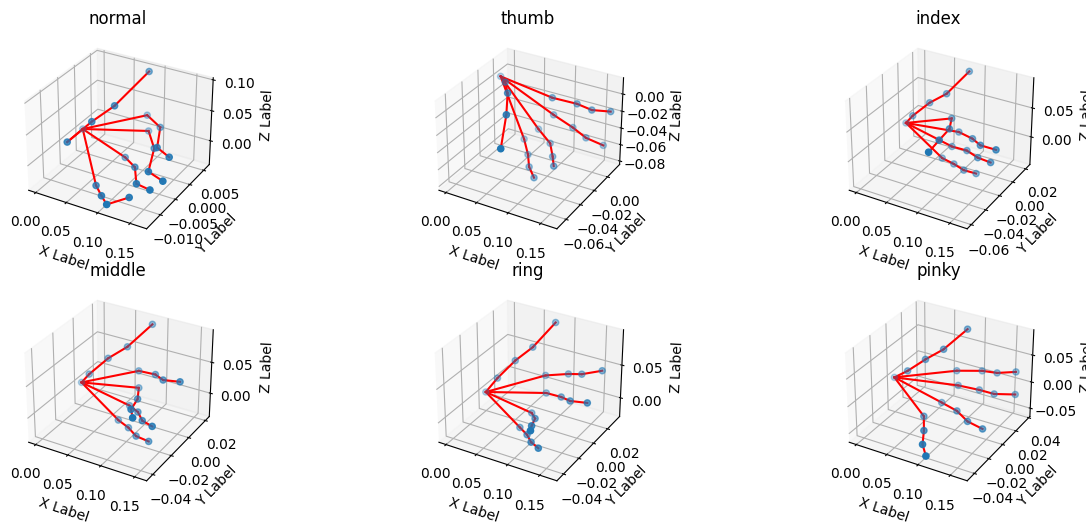

In [16]:
bones = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # 拇指
        (0, 5), (5, 6), (6, 7), (7, 8),  # 食指
        (0, 9), (9, 10), (10, 11), (11, 12),  # 中指
        (0, 13), (13, 14), (14, 15), (15, 16),  # 无名指
        (0, 17), (17, 18), (18, 19), (19, 20)  # 小指
    ]
fingers = ['normal', 'thumb', 'index', 'middle', 'ring', 'pinky']

fig = plt.figure(figsize=(15, 6))

for idx, finger in enumerate(fingers):
    joints = np.load(f'/home/birl/Pictures/{finger}_mesh.npz')['joints'][0] * -1
    
    ax = fig.add_subplot(2, 3, idx+1, projection='3d')
    ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2])

    # 画线
    for bone in bones:
        points = joints[list(bone), :]
        ax.plot(points[:, 0], points[:, 1], points[:, 2], 'r')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(finger)

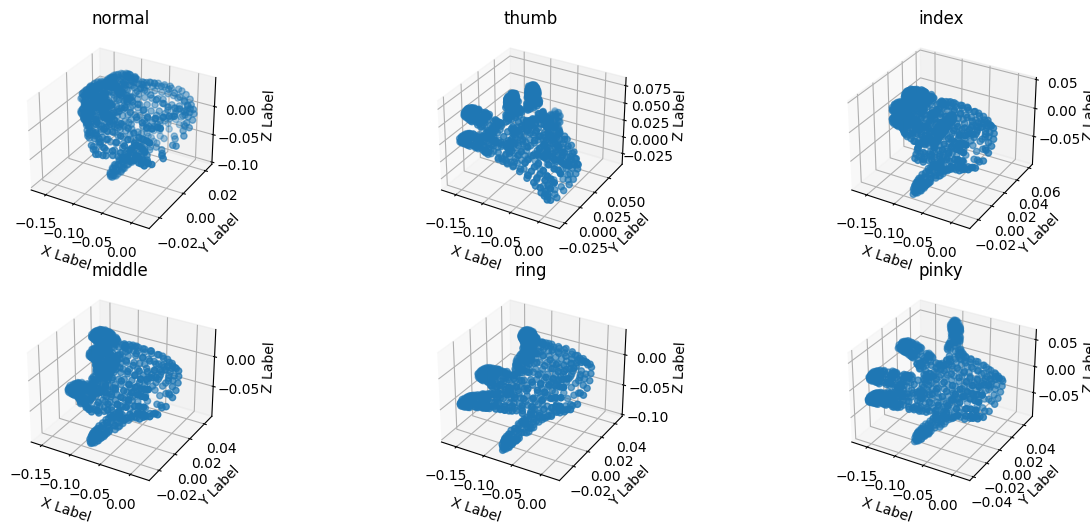

In [21]:
bones = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # 拇指
        (0, 5), (5, 6), (6, 7), (7, 8),  # 食指
        (0, 9), (9, 10), (10, 11), (11, 12),  # 中指
        (0, 13), (13, 14), (14, 15), (15, 16),  # 无名指
        (0, 17), (17, 18), (18, 19), (19, 20)  # 小指
    ]
fingers = ['normal', 'thumb', 'index', 'middle', 'ring', 'pinky']

fig = plt.figure(figsize=(15, 6))

for idx, finger in enumerate(fingers):
    vertices = np.load(f'/home/birl/Pictures/{finger}_mesh.npz')['vertices'][0] # (778, 3)
    
    ax = fig.add_subplot(2, 3, idx+1, projection='3d')
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])

    # # 画线
    # for bone in bones:
    #     points = joints[list(bone), :]
    #     ax.plot(points[:, 0], points[:, 1], points[:, 2], 'r')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(finger)

In [1]:
import socket

host = socket.gethostname()
host

'birl-ws'

In [11]:
import numpy as np

bones = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # 拇指
        (0, 5), (5, 6), (6, 7), (7, 8),  # 食指
        (0, 9), (9, 10), (10, 11), (11, 12),  # 中指
        (0, 13), (13, 14), (14, 15), (15, 16),  # 无名指
        (0, 17), (17, 18), (18, 19), (19, 20)  # 小指
    ]
fingers = ['normal', 'thumb', 'index', 'middle', 'ring', 'pinky']


joints = np.load(f'/home/birl/code/MeshGraphormer/samples/anchor0_mesh.npz')['joints'][0].round(4)
print(joints)
print('thumb_tip', joints[4], 'thumb_base', joints[2], 'thumb_length', np.linalg.norm(joints[4] - joints[2]))
print('index_tip', joints[8], 'index_base', joints[5], 'index_length', np.linalg.norm(joints[8] - joints[5]))
print('middle_tip', joints[12], 'middle_base', joints[9], 'middle_length', np.linalg.norm(joints[12] - joints[9]))
print('ring_tip', joints[16], 'ring_base', joints[13], 'ring_length', np.linalg.norm(joints[16] - joints[13]))
print('pinky_tip', joints[20], 'pinky_base', joints[17], 'pinky_length', np.linalg.norm(joints[20] - joints[17]))

[[-0.      0.     -0.    ]
 [-0.0236  0.0153 -0.0245]
 [-0.0432  0.0156 -0.0459]
 [-0.0629  0.0148 -0.0599]
 [-0.083   0.0096 -0.0852]
 [-0.0818  0.0055 -0.0209]
 [-0.1123  0.003  -0.0159]
 [-0.1323  0.004  -0.0102]
 [-0.1547  0.0002 -0.0049]
 [-0.089   0.0028 -0.0003]
 [-0.1176  0.0025  0.0047]
 [-0.1379  0.0041  0.0108]
 [-0.1603 -0.0014  0.0181]
 [-0.0791  0.0048  0.0202]
 [-0.1049  0.0047  0.021 ]
 [-0.1259  0.0056  0.0253]
 [-0.1468  0.0032  0.0278]
 [-0.0692  0.0091  0.0349]
 [-0.0873  0.0107  0.0393]
 [-0.1037  0.0118  0.0428]
 [-0.1203  0.0084  0.0448]]
thumb_tip [-0.083   0.0096 -0.0852] thumb_base [-0.0432  0.0156 -0.0459] thumb_length 0.056254152
index_tip [-0.1547  0.0002 -0.0049] index_base [-0.0818  0.0055 -0.0209] index_length 0.074823126
middle_tip [-0.1603 -0.0014  0.0181] middle_base [-0.089   0.0028 -0.0003] middle_length 0.07375561
ring_tip [-0.1468  0.0032  0.0278] ring_base [-0.0791  0.0048  0.0202] ring_length 0.06814404
pinky_tip [-0.1203  0.0084  0.0448] pinky_

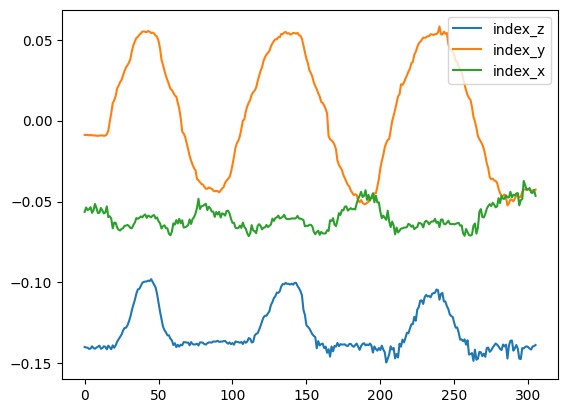

In [7]:
import numpy as np
import matplotlib.pyplot as plt
joints = np.load('data/joints.npy')[10:]

all_data = []
for i in range(joints.shape[0]):
    joints_xyz = joints[i] # (21, 3)
    # get angle between index and middle finger
    index_vec = joints_xyz[8] - joints_xyz[5]
    middle_vec = joints_xyz[12] - joints_xyz[9]
    # get degree between index and middle finger
    dot = np.dot(index_vec, middle_vec)
    norm = np.linalg.norm(index_vec) * np.linalg.norm(middle_vec)
    cos = dot / norm
    angle_index_middle = np.degrees(np.arccos(cos))
    # array = joints_xyz[8].tolist() # index finger tip joint
    # array.append(angle_index_middle)
    all_data.append(angle_index_middle)

# index finger
plt.plot(joints[:, 8, 0], label='index_z')
plt.plot(joints[:, 8, 1], label='index_y')
plt.plot(joints[:, 8, 2], label='index_x')
# plt.plot(joints[:, 12, 0], label='middle_z')
# plt.plot(joints[:, 12, 1], label='middle_y')
# plt.plot(joints[:, 12, 2], label='middle_x')
# plt.plot(all_data, label='angle')
plt.legend()

In [ ]:
from collections import deque
class MovingAverage:
    def __init__(self, window_size):
        self.window_size = window_size
        self.window = deque(maxlen=window_size)
        self.sum = 0

    def update(self, new_value):
        if len(self.window) == self.window_size:
            self.sum -= self.window.popleft()
        self.window.append(new_value)
        self.sum += new_value
        return self.sum / len(self.window)